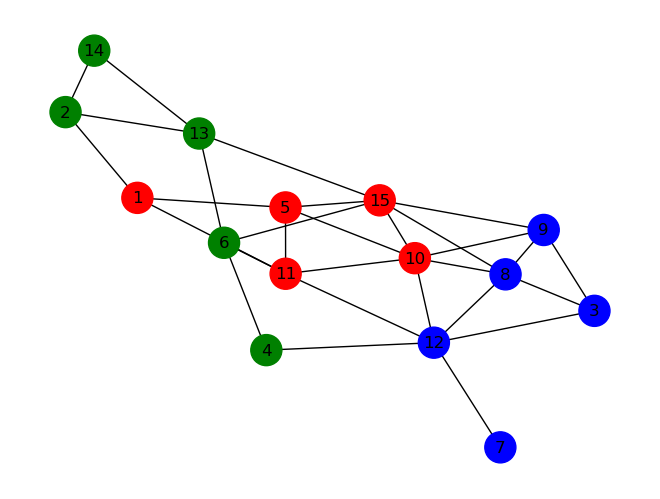

In [1]:
#Q3
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import random

def show_graph_with_labels(adjacency_matrix, mylabels):
    rows, cols = np.where(adjacency_matrix == 1)
    edges = zip(rows.tolist(), cols.tolist())
    gr = nx.Graph()
    gr.add_edges_from(edges)
    l={}
    col = []
    for i in range(n):
        l[i]=str(i+1)
    for node in gr:
        col.append((color[z0[node]]))
    nx.draw(gr, node_size=500, labels=l, with_labels=True,node_color=col)
    plt.show()

def build_adj():
    adj = np.array( [[2 for i in range(n)] for j in range(n)] )
    for i in range(n):
        adj[i][i] = 0

    isok=False
    while not isok:
        for i in range(n):
            for j in range(i+1,n):
                if z0[i]==z0[j]:
                    adj[i][j] = np.random.binomial(1, 0.6)
                    adj[j][i] = adj[i][j]
                else:
                    adj[i][j] = np.random.binomial(1, 0.1)
                    adj[j][i] = adj[i][j]
        isok = True
        for i in range(n):
            adjs = 0
            for j in range(n):
                if adj[i][j]==1:
                    adjs += 1
            if adjs==0:
                isok = False
    return adj

    
n=15
z0 = [3,1,2,1,3,1,2,2,2,3,3,2,1,1,3]
color={1:'green' , 2:'blue' ,3:'red'}
adj = build_adj()
show_graph_with_labels(adj, z0)


In [2]:
#Q4
def hamming(z1,z2):
    ans = 0
    for i in range(len(z1)):
        if z1[i]!=z2[i]:
            ans+=1
    return ans


In [3]:
#Q5
def find_permutations(allz,myset, path):
    if len(myset) == 0:
        allz.append(path.copy())
        return
    for x in myset:
        news=myset.copy()
        news.remove(x)
        path.append(x)
        find_permutations(allz,news,path)
        path.pop()
    return
    
def min_hamming(z1,z2):
    m = 9999999
    allz = []
    myset= set()
    for i in z2:
        myset.add(i)
    find_permutations(allz,myset,[])
    for z in allz:
        newz = []
        for i in z2:
            newz.append(z[i-1])
        m = min(m,hamming(z1,newz))
    return m


min_hamming([1,1,1,1,1,1,1],[1,1,2,2,2,3,3])


4

In [4]:
#Q6
def l_of_z(adj,z):
    sum = 0
    for i in range(n):
        for j in range(i+1,n):
            if z[i]==z[j]:
                if adj[i][j] == 1:
                    sum += np.log(0.6)
                else:
                    sum += np.log(0.4)
            else:
                if adj[i][j] == 1:
                    sum += np.log(0.1)
                else:
                    sum += np.log(0.9)
    sum = -sum
    return sum

l_of_z(adj , z0)                    

52.26185903531309

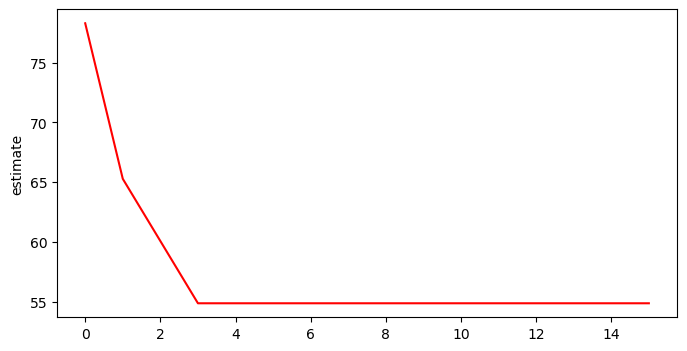

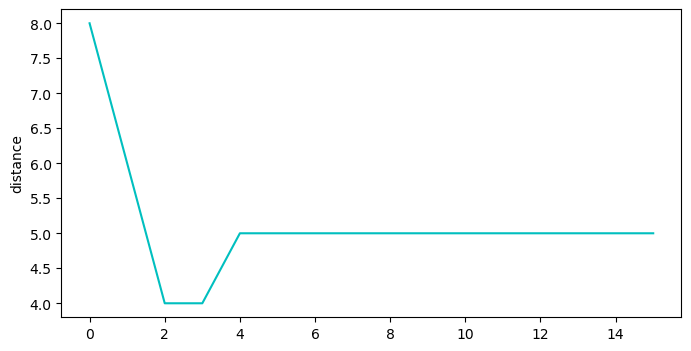

[1, 3, 2, 1, 1, 1, 3, 2, 2, 2, 1, 2, 3, 3, 3] 54.86454872075745


In [5]:
#Q7
T = 15
est_z = [1,1,1,1,1,2,2,2,2,2,3,3,3,3,3]

def find_estimate(est_z,T):
    estimates = []
    dist = []
    estimates.append(l_of_z(adj,est_z))
    dist.append(min_hamming(z0,est_z))
    for k in range(T):
        lowest = 999999999
        i_best = 0
        j_best = 0
        for i in range(n):
            for j in range(n):
                est_z[i],est_z[j] = est_z[j],est_z[i]
                tmp = l_of_z(adj,est_z)
                if(lowest> tmp ):
                    lowest = tmp
                    i_best = i
                    j_best = j
                est_z[i],est_z[j] = est_z[j],est_z[i]

        est_z[i_best],est_z[j_best] = est_z[j_best],est_z[i_best]
        estimates.append(lowest)
        dist.append(min_hamming(z0,est_z))

    plt.figure(figsize=(8,4))
    plt.plot(estimates,color='r')
    plt.ylabel("estimate")
    plt.show()
    plt.figure(figsize=(8,4))
    plt.plot(dist,color='c')
    plt.ylabel("distance")
    plt.show()
    print(est_z,estimates[-1])

find_estimate(est_z,T)

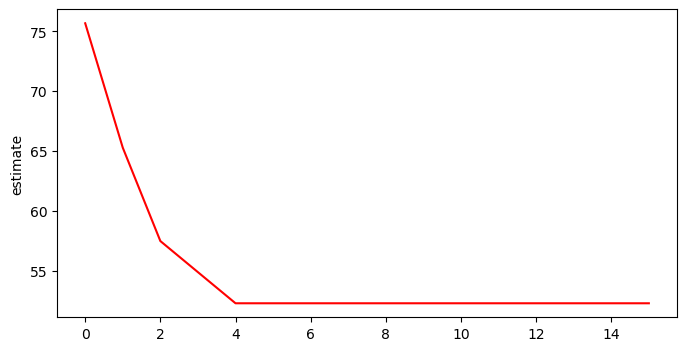

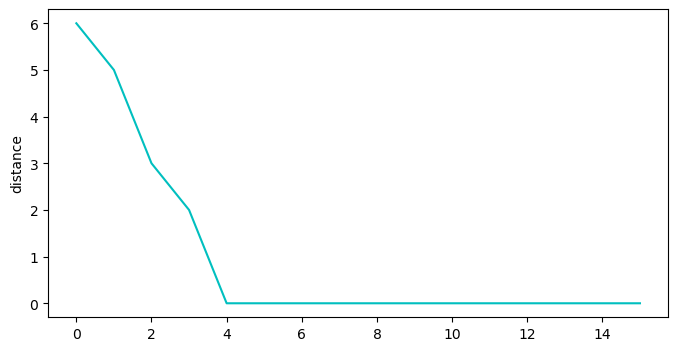

[2, 1, 3, 1, 2, 1, 3, 3, 3, 2, 2, 3, 1, 1, 2] 52.26185903531309


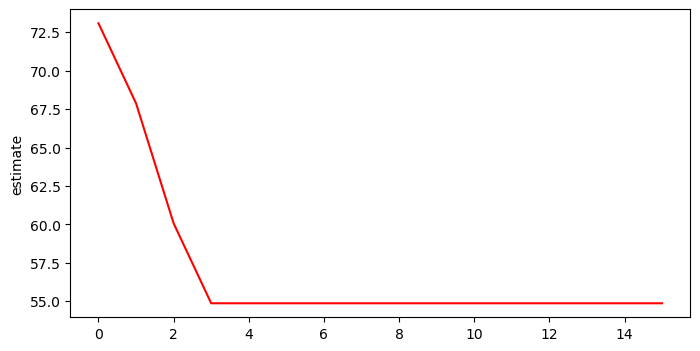

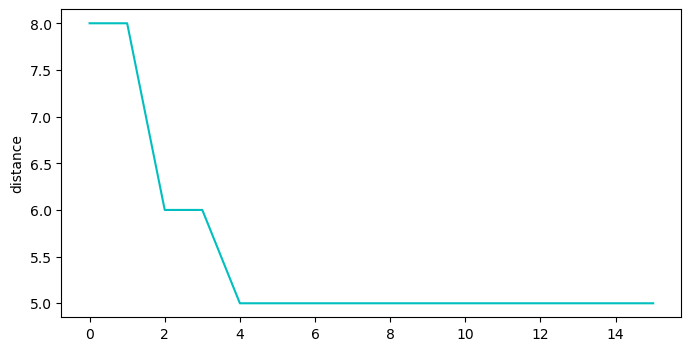

[3, 2, 1, 3, 3, 3, 2, 1, 1, 1, 3, 1, 2, 2, 2] 54.86454872075745


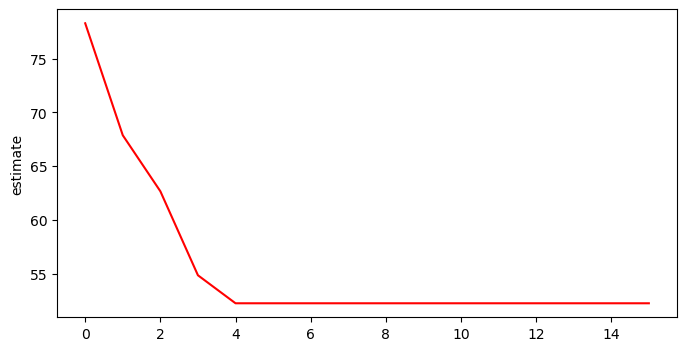

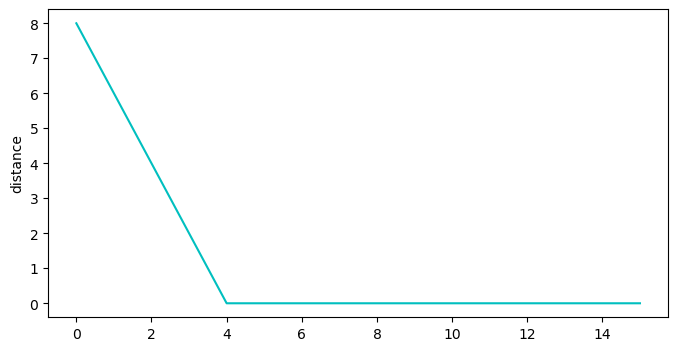

[2, 3, 1, 3, 2, 3, 1, 1, 1, 2, 2, 1, 3, 3, 2] 52.26185903531309


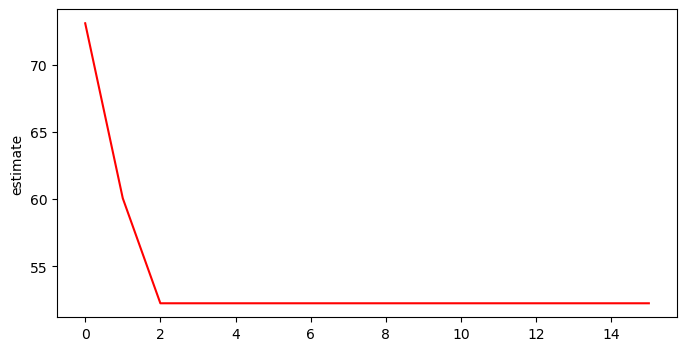

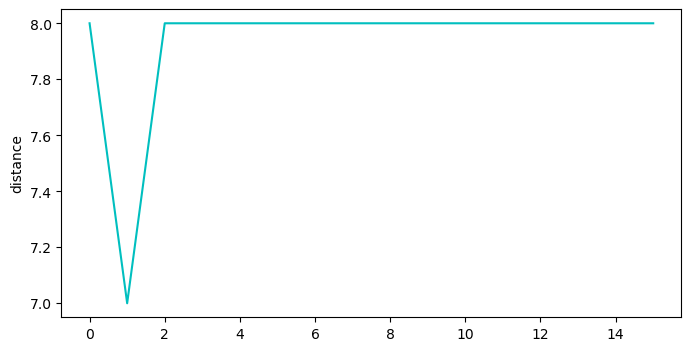

[3, 3, 2, 1, 3, 1, 1, 2, 2, 2, 1, 1, 3, 3, 2] 52.261859035313094


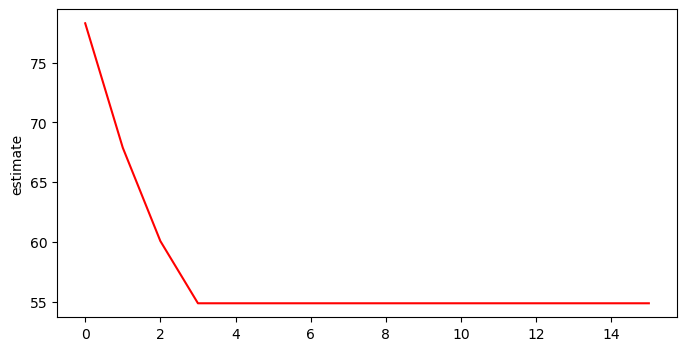

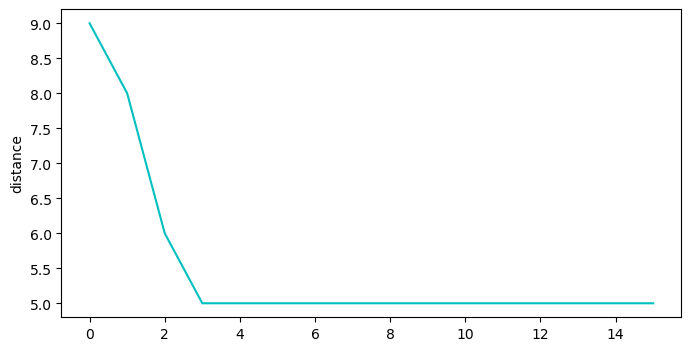

[2, 2, 3, 1, 2, 1, 1, 3, 3, 3, 2, 3, 1, 2, 1] 54.86454872075747


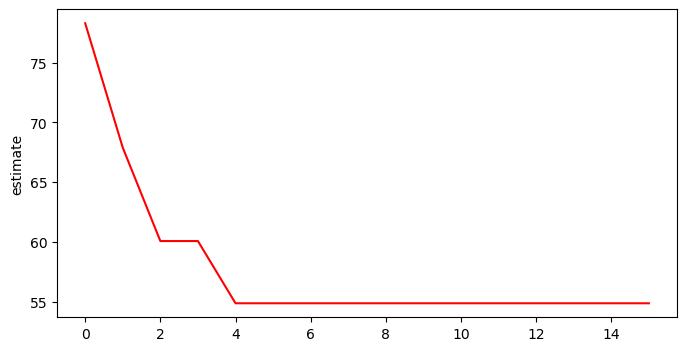

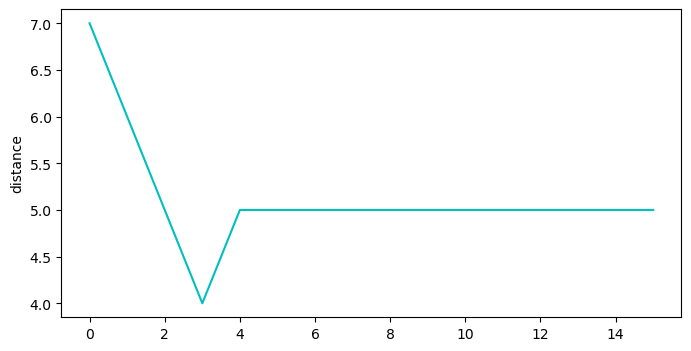

[2, 2, 1, 3, 2, 3, 3, 1, 1, 1, 2, 1, 3, 2, 3] 54.86454872075747


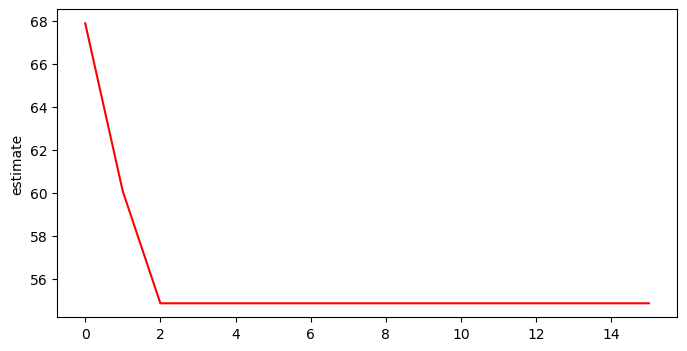

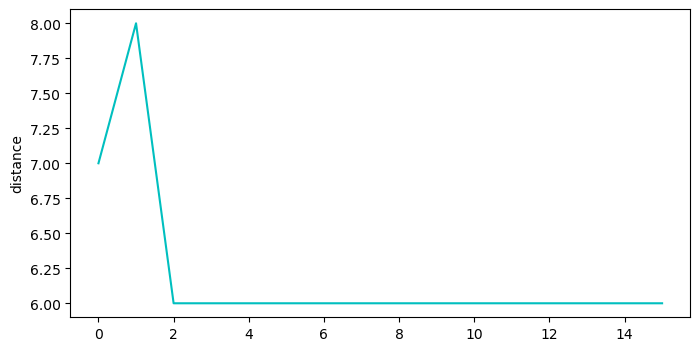

[3, 3, 2, 2, 1, 2, 2, 1, 1, 1, 3, 2, 3, 3, 1] 54.86454872075746


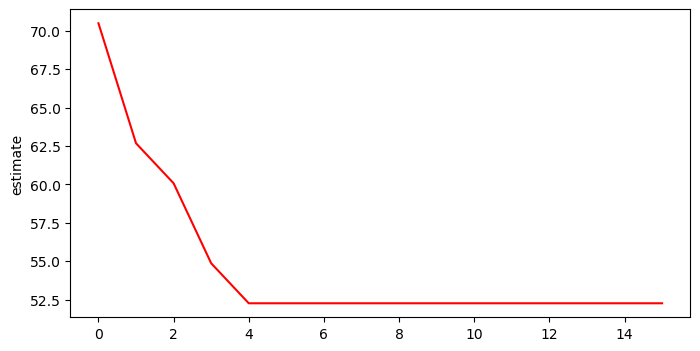

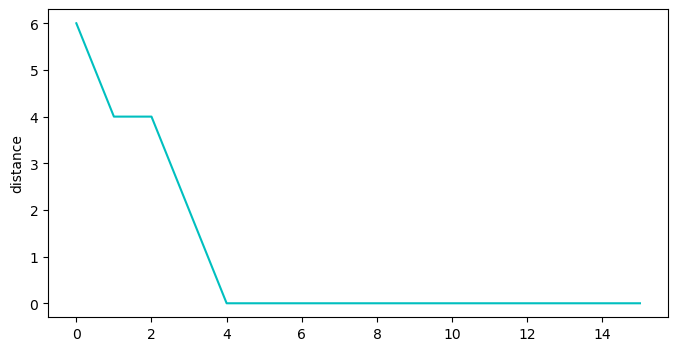

[2, 3, 1, 3, 2, 3, 1, 1, 1, 2, 2, 1, 3, 3, 2] 52.26185903531309


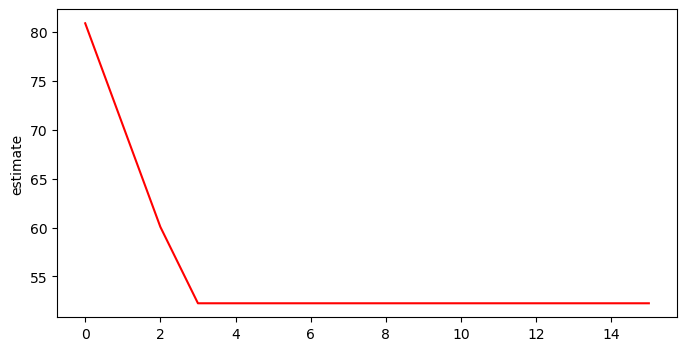

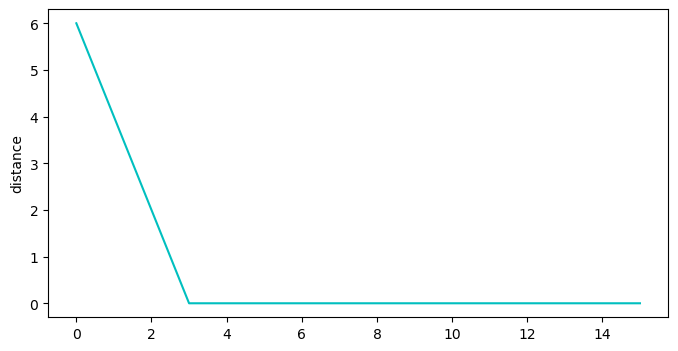

[1, 3, 2, 3, 1, 3, 2, 2, 2, 1, 1, 2, 3, 3, 1] 52.26185903531309


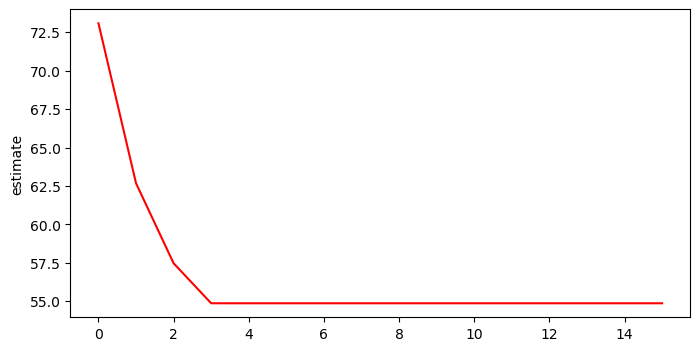

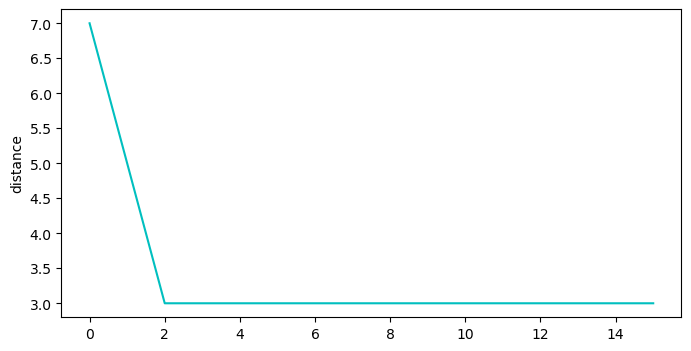

[2, 3, 1, 1, 2, 3, 1, 1, 2, 2, 2, 1, 3, 3, 3] 54.86454872075746


In [6]:
#Q8
estimates = []
for i in range(10):
    random.shuffle(est_z)
    find_estimate(est_z,T)
    estimates.append(est_z.copy())

In [7]:
#Q9

indexes = []
for ids, est in enumerate(estimates):
    base = l_of_z(adj,z0)
    tmp = l_of_z(adj,est)
    print("diffrence is : " ,tmp - base, end =" ")
    if tmp == base:
        print("index is ", ids ," lowest hamming is : ", min_hamming(z0,est))
    else:
        print()
    if min_hamming(z0,est) == 0 :
        indexes.append(ids)
        


diffrence is :  0.0 index is  0  lowest hamming is :  0
diffrence is :  2.6026896854443606 
diffrence is :  0.0 index is  2  lowest hamming is :  0
diffrence is :  7.105427357601002e-15 
diffrence is :  2.602689685444382 
diffrence is :  2.602689685444382 
diffrence is :  2.602689685444375 
diffrence is :  0.0 index is  7  lowest hamming is :  0
diffrence is :  0.0 index is  8  lowest hamming is :  0
diffrence is :  2.602689685444375 


In [8]:
#Q10
for i in indexes:
    print(i,"index min distance is zero")
    

0 index min distance is zero
2 index min distance is zero
7 index min distance is zero
8 index min distance is zero


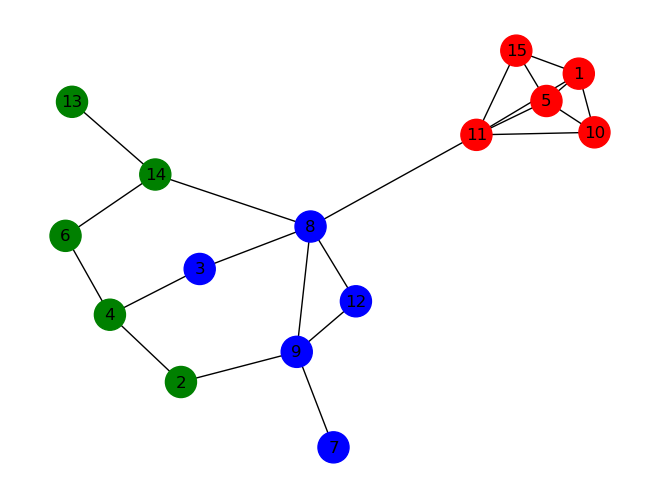

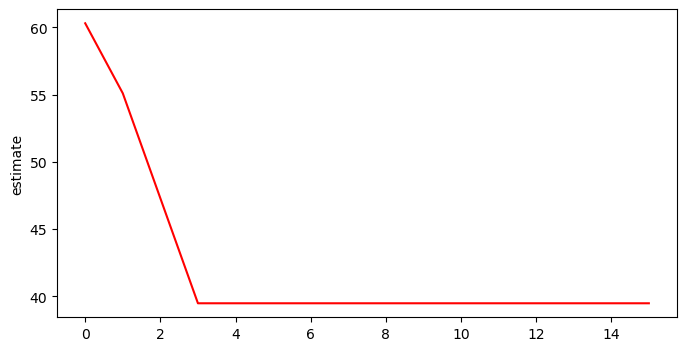

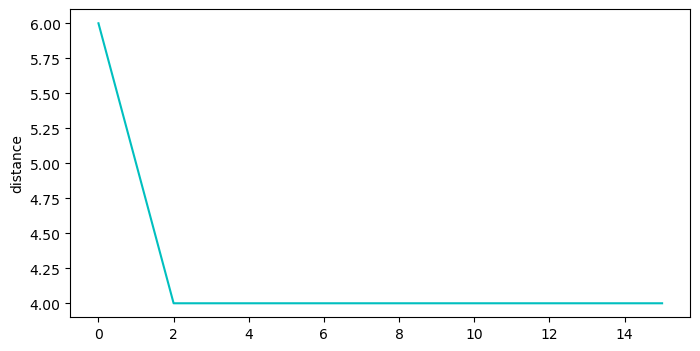

[2, 3, 3, 3, 2, 1, 3, 1, 3, 2, 2, 1, 1, 1, 2] 39.48397667940392


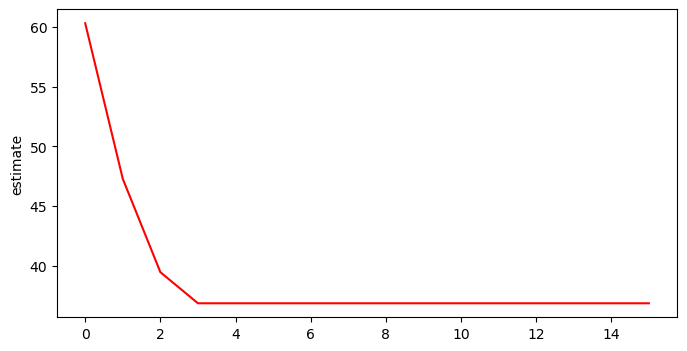

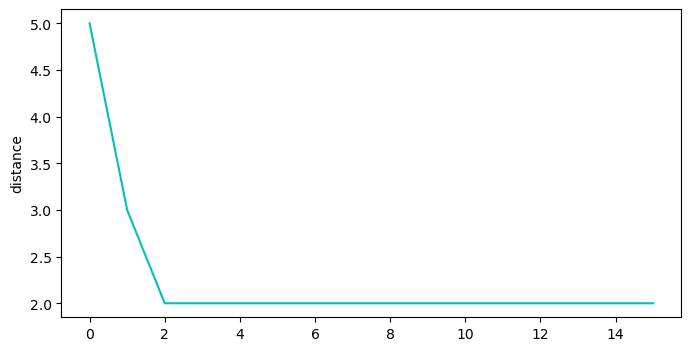

[3, 2, 1, 1, 3, 1, 2, 2, 2, 3, 3, 2, 1, 1, 3] 36.881286993959556


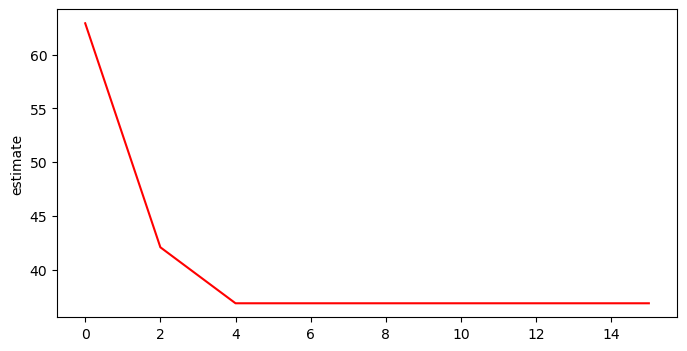

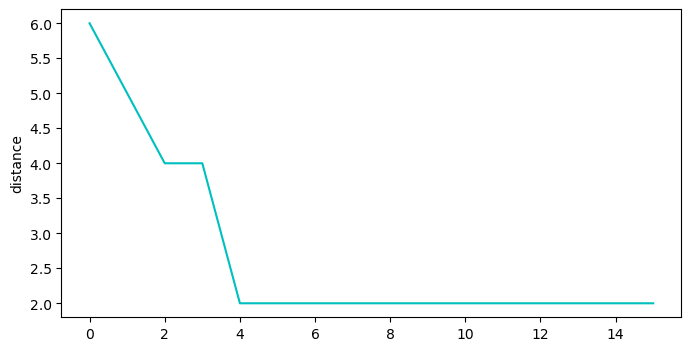

[3, 1, 2, 2, 3, 2, 1, 1, 1, 3, 3, 1, 2, 2, 3] 36.881286993959556


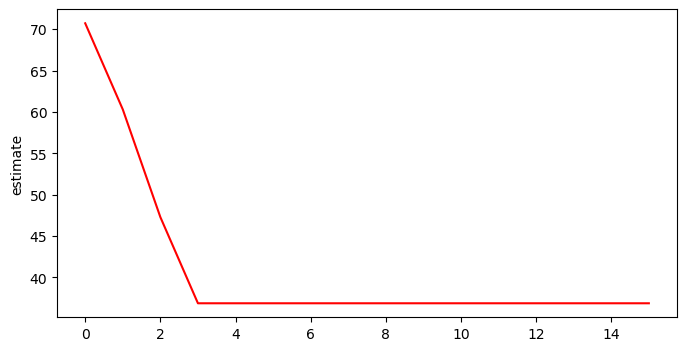

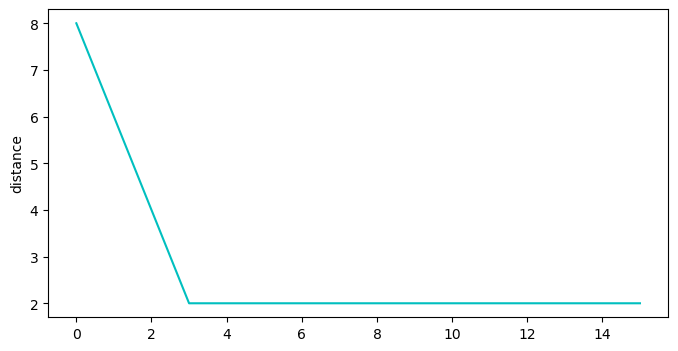

[3, 1, 2, 2, 3, 2, 1, 1, 1, 3, 3, 1, 2, 2, 3] 36.881286993959556


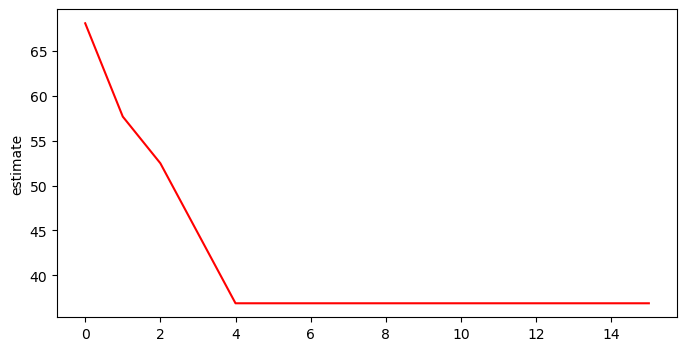

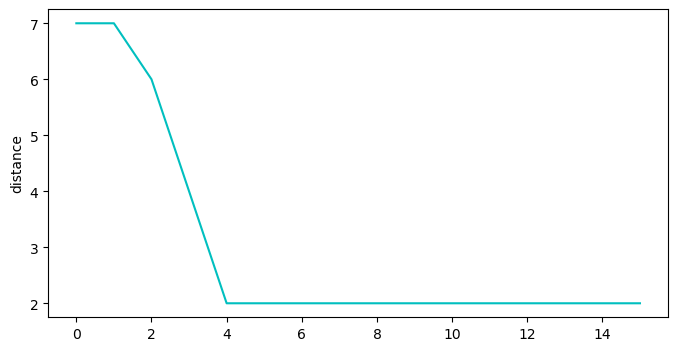

[3, 1, 2, 2, 3, 2, 1, 1, 1, 3, 3, 1, 2, 2, 3] 36.881286993959556


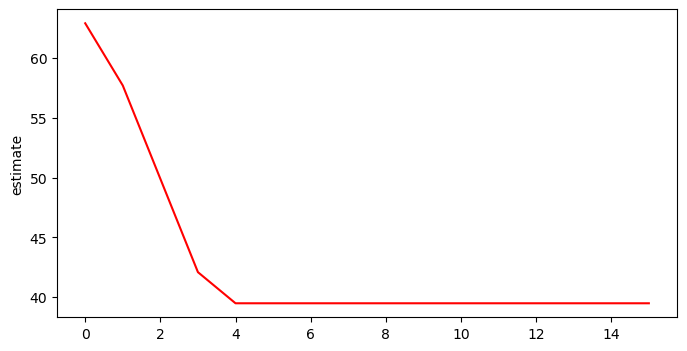

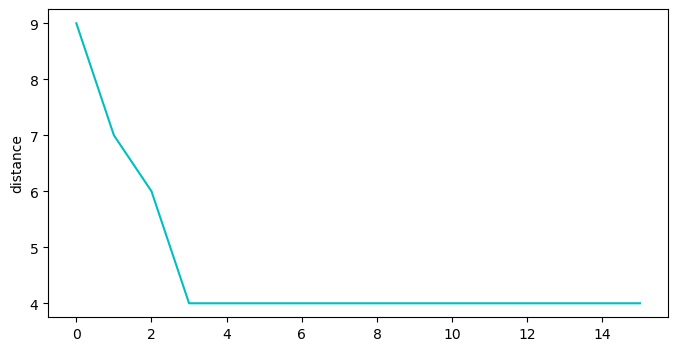

[3, 1, 1, 1, 3, 2, 1, 2, 1, 3, 3, 2, 2, 2, 3] 39.48397667940392


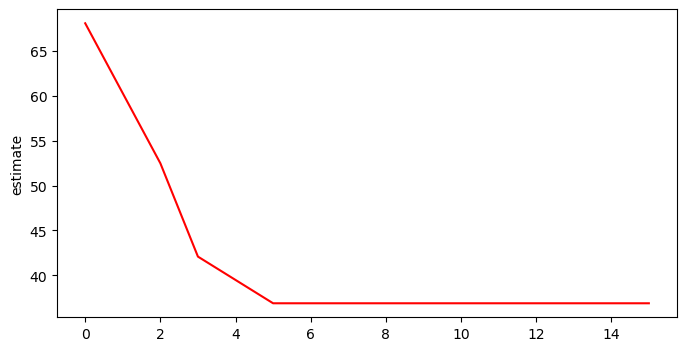

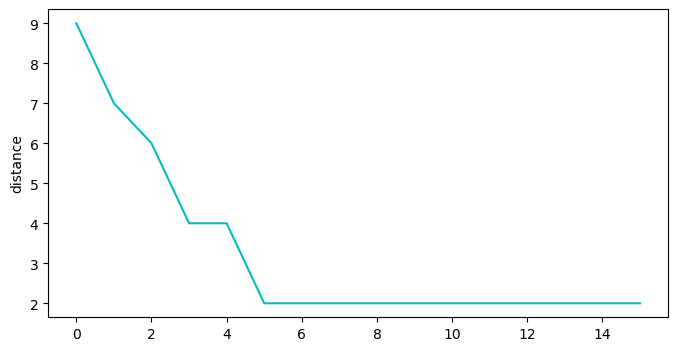

[3, 1, 2, 2, 3, 2, 1, 1, 1, 3, 3, 1, 2, 2, 3] 36.881286993959556


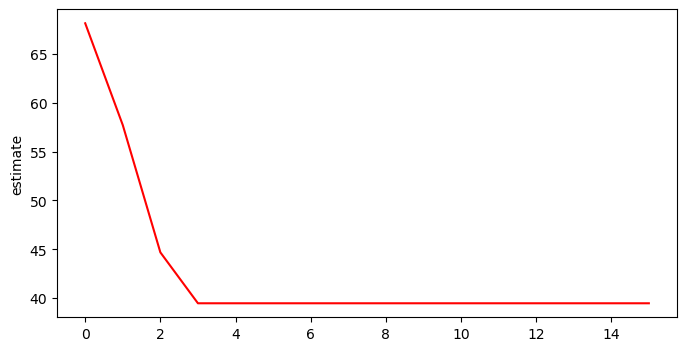

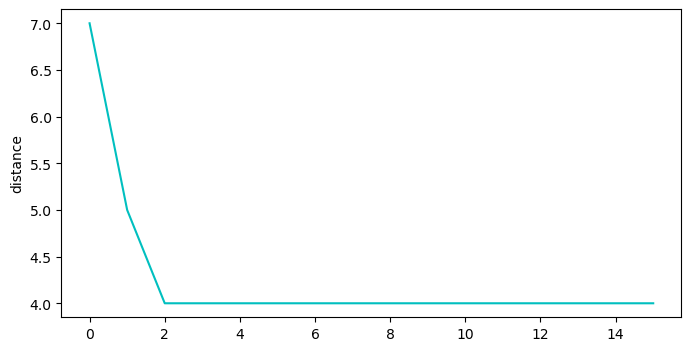

[2, 1, 1, 1, 2, 3, 1, 3, 1, 2, 2, 3, 3, 3, 2] 39.48397667940392


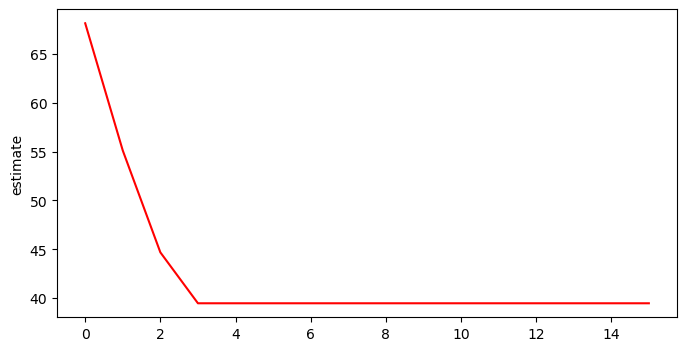

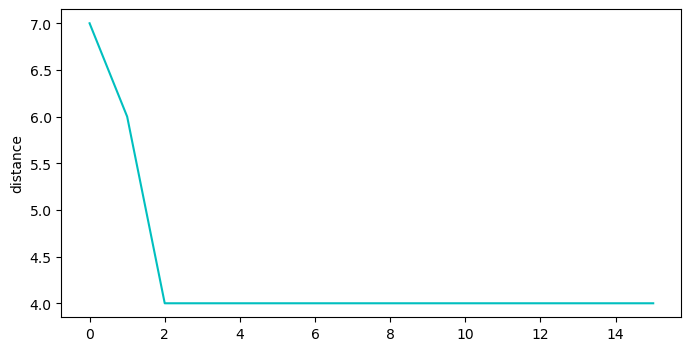

[3, 2, 2, 2, 3, 2, 2, 1, 1, 3, 3, 1, 1, 1, 3] 39.48397667940392


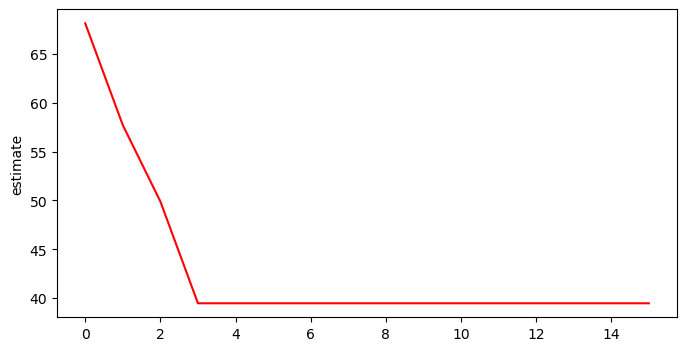

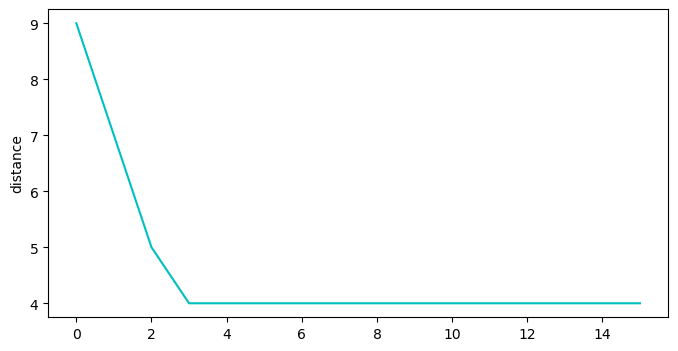

[3, 2, 2, 2, 3, 2, 2, 1, 1, 3, 3, 1, 1, 1, 3] 39.48397667940392


best estimate is [3, 2, 2, 2, 3, 2, 2, 1, 1, 3, 3, 1, 1, 1, 3] with distance 2


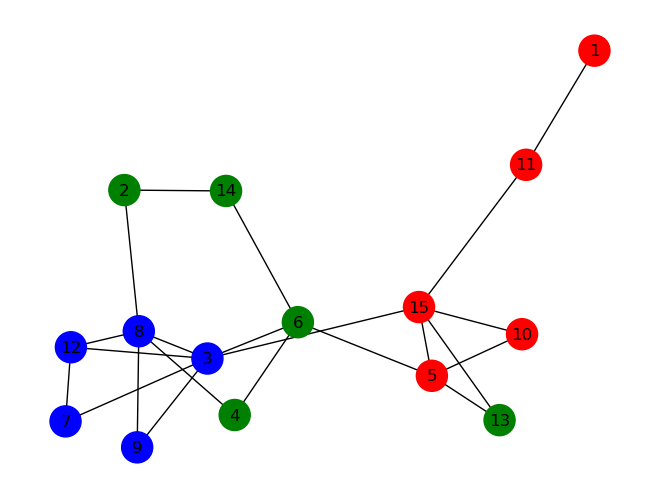

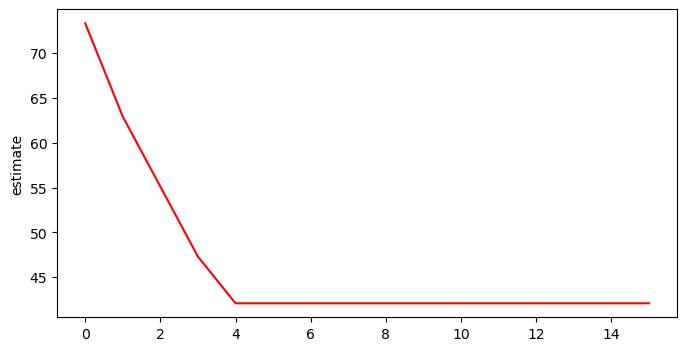

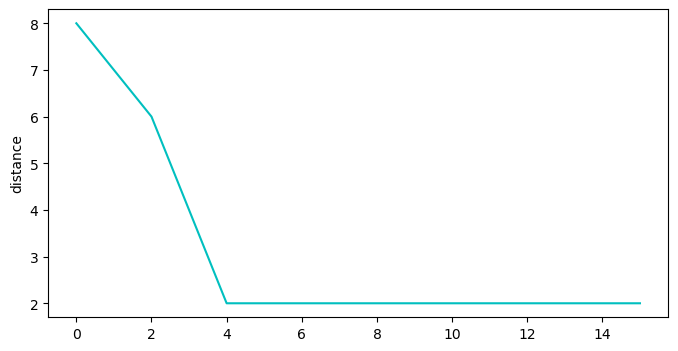

[1, 1, 2, 1, 3, 1, 2, 2, 2, 3, 3, 2, 3, 1, 3] 42.08666636484834


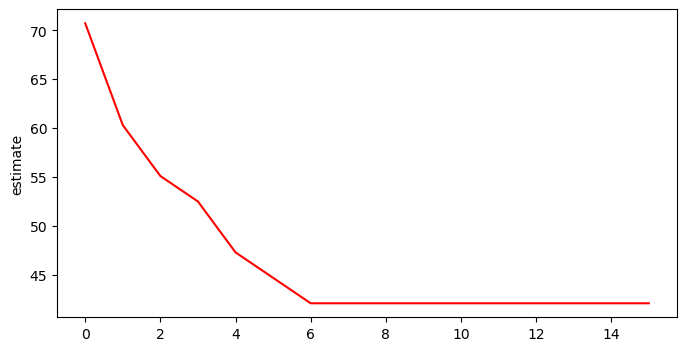

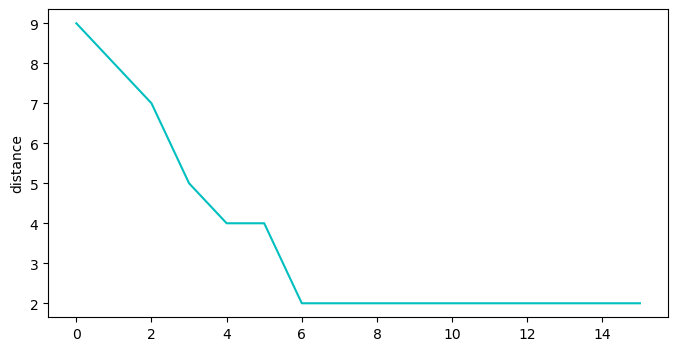

[3, 3, 2, 3, 1, 3, 2, 2, 2, 1, 1, 2, 1, 3, 1] 42.08666636484834


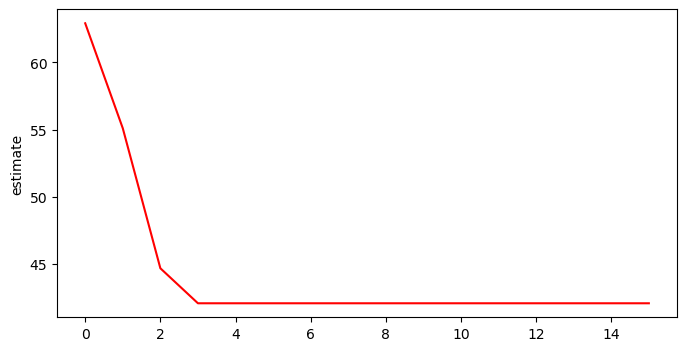

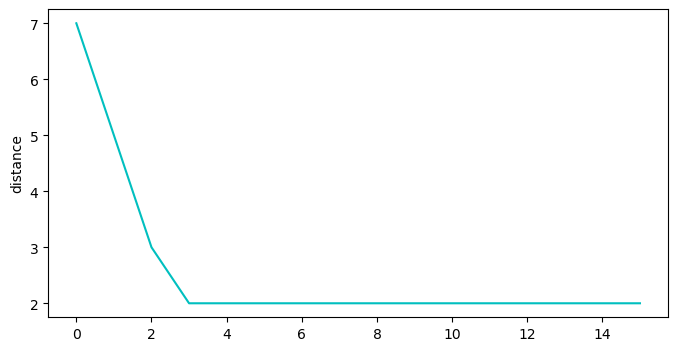

[3, 3, 2, 3, 1, 3, 2, 2, 2, 1, 1, 2, 1, 3, 1] 42.08666636484834


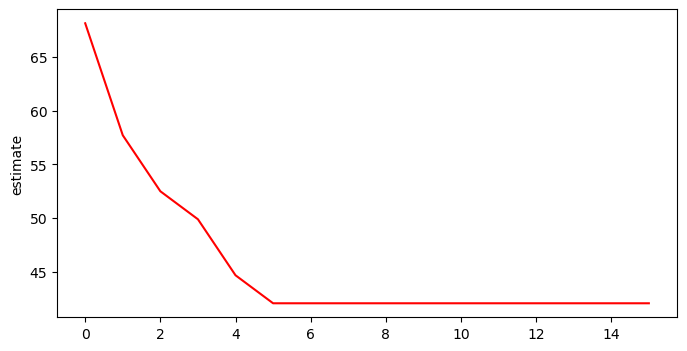

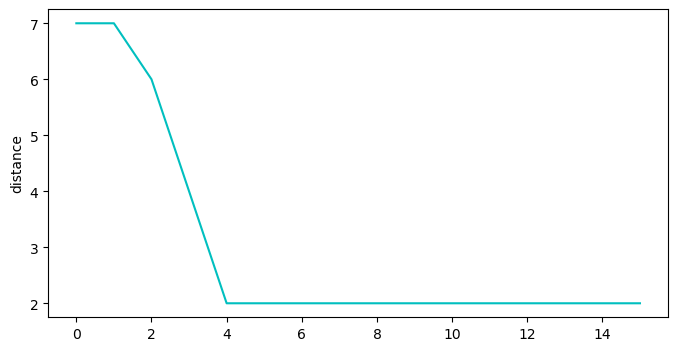

[1, 1, 2, 1, 3, 1, 2, 2, 2, 3, 3, 2, 3, 1, 3] 42.08666636484834


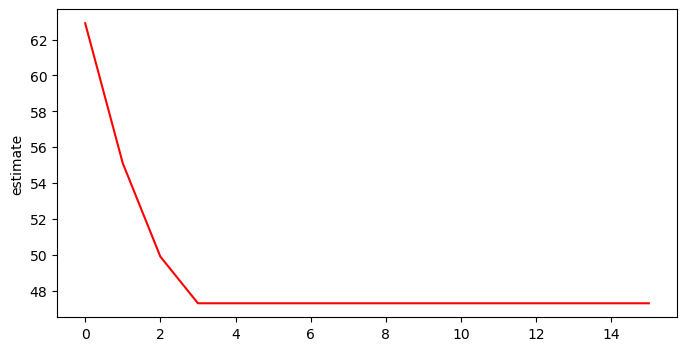

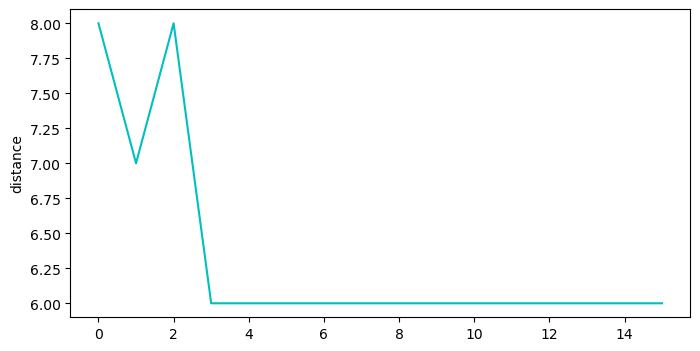

[1, 1, 3, 3, 2, 3, 1, 3, 3, 2, 2, 1, 2, 1, 2] 47.292045735737126


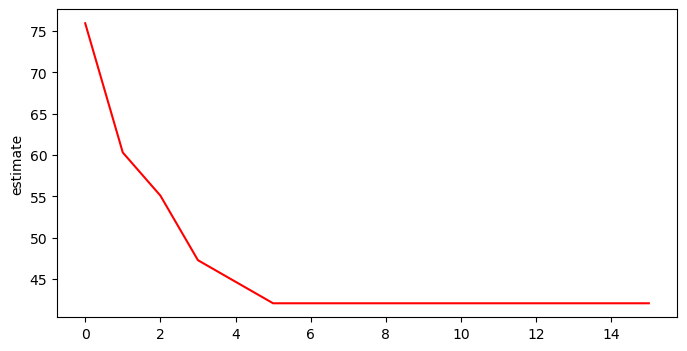

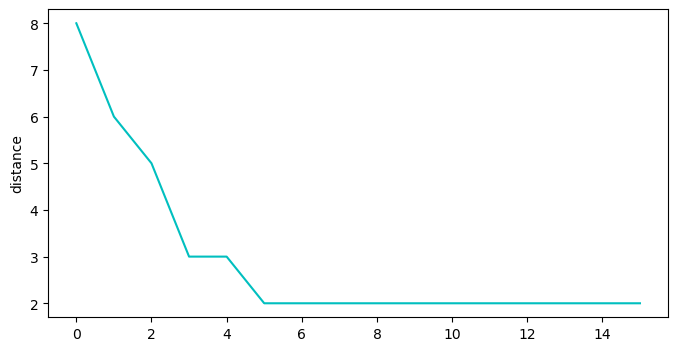

[2, 2, 1, 2, 3, 2, 1, 1, 1, 3, 3, 1, 3, 2, 3] 42.08666636484834


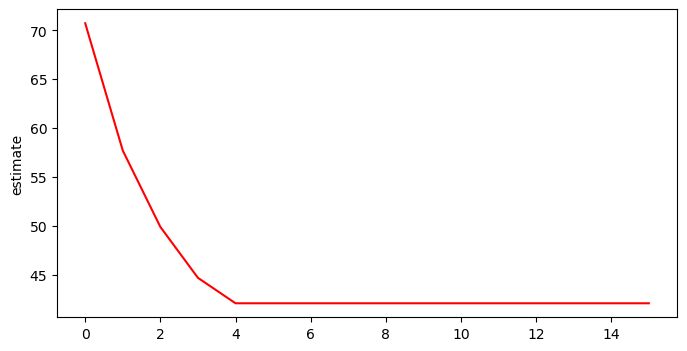

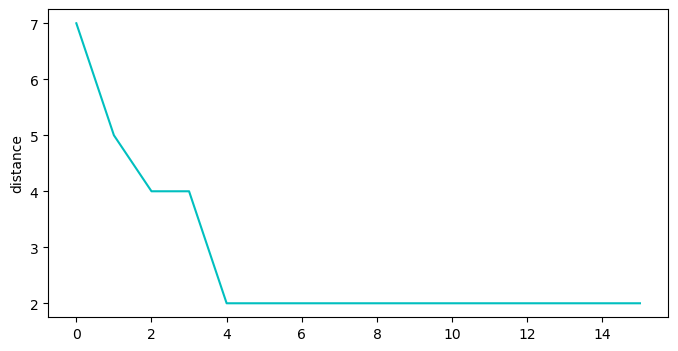

[1, 1, 2, 1, 3, 1, 2, 2, 2, 3, 3, 2, 3, 1, 3] 42.08666636484834


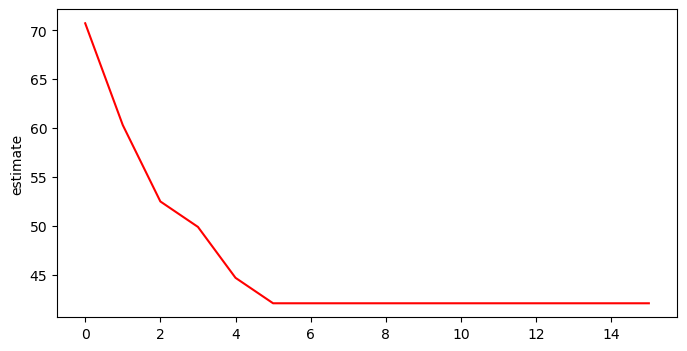

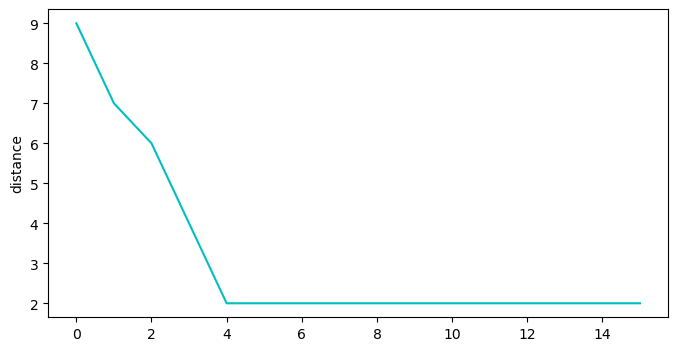

[1, 1, 2, 1, 3, 1, 2, 2, 2, 3, 3, 2, 3, 1, 3] 42.08666636484834


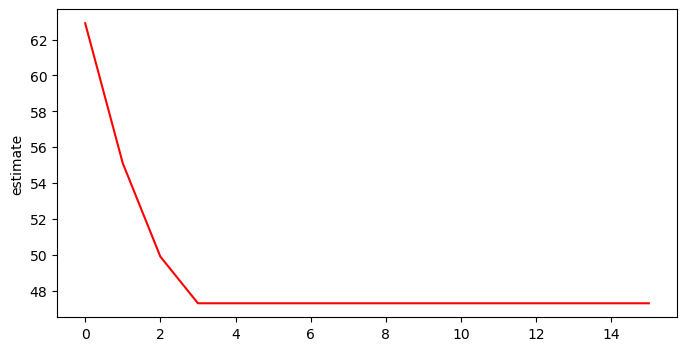

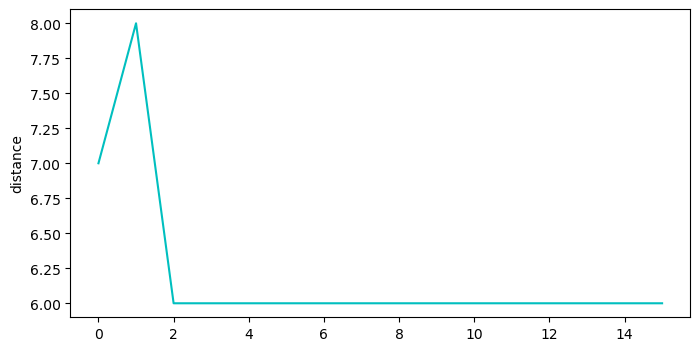

[3, 3, 2, 2, 1, 2, 2, 3, 3, 1, 1, 2, 1, 3, 1] 47.29204573573711


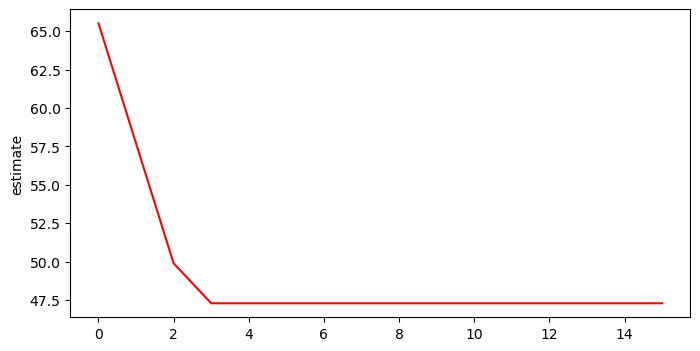

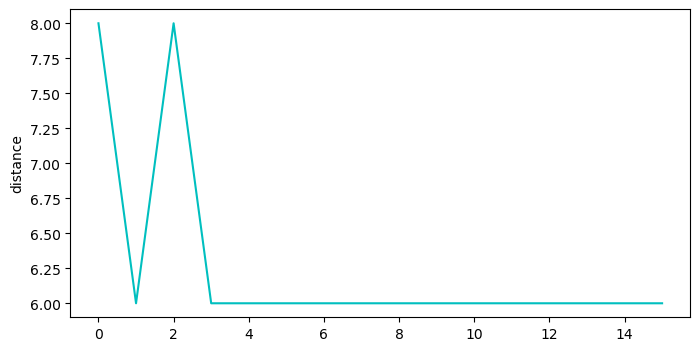

[2, 2, 1, 1, 3, 1, 1, 2, 2, 3, 3, 1, 3, 2, 3] 47.29204573573711


best estimate is [2, 2, 1, 1, 3, 1, 1, 2, 2, 3, 3, 1, 3, 2, 3] with distance 2


In [9]:
#Q11
adj = build_adj()
show_graph_with_labels(adj, z0)
estimates = []
for i in range(10):
    random.shuffle(est_z)
    find_estimate(est_z,T)
    estimates.append(est_z.copy())

lowest = 99999
best = None
for ids, est in enumerate(estimates):
    tmp = min_hamming(z0,est)
    if tmp < lowest:
        lowest = tmp
        best = est
print()
print()
print("best estimate is",est,"with distance",lowest)
    
    
adj = build_adj()
show_graph_with_labels(adj, z0)
estimates = []
for i in range(10):
    random.shuffle(est_z)
    find_estimate(est_z,T)
    estimates.append(est_z.copy())

    
    
lowest = 99999
best = None
for ids, est in enumerate(estimates):
    tmp = min_hamming(z0,est)
    if tmp < lowest:
        lowest = tmp
        best = est
        
print()
print()
print("best estimate is",est,"with distance",lowest)

In [23]:
#Q12(emtiazi)
n = 1000
p = 0.0034
m = 3000
relat = 0

for k in range(10):
    adj = np.array( [[2 for i in range(n)] for j in range(n)] )
    for i in range(n):
        adj[i][i] = 0


    for i in range(n):
        for j in range(i+1,n):
                adj[i][j] = np.random.binomial(1, p)
                adj[j][i] = adj[i][j]
                if adj[j][i] == 1:
                    relat +=2
                    
print(relat/10)
almost = relat/10 < m * 1.05
almost = almost & (relat/10 > m * 0.95)

print("almost equal m",almost)


3412.6
almost equal m False


150
0.15
141
170
0.17
151
174
0.174
150
166
0.166
150
148
0.148
143
182
0.182
173
146
0.146
139
206
0.206
181
140
0.14
127
150
0.15
142
average 149.7
[8503, 1368, 123, 6, 0, 0, 0, 0, 0, 0]
[850.3, 136.8, 12.3, 0.6, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


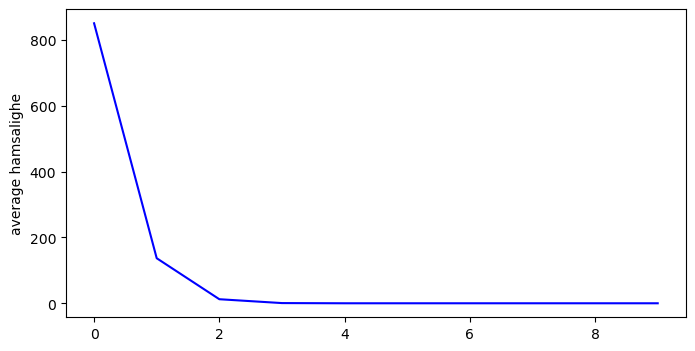

In [35]:
#Q13(emtiazi)
p = 0.00016

avg_hamrang = 0
avg_hamsalighe = [0 for i in range(10)]

for i in range(10):

    adj = np.array( [[2 for i in range(n)] for j in range(n)] )
    for i in range(n):
        adj[i][i] = 0

    relat = 0
    for i in range(n):
        for j in range(i+1,n):
                adj[i][j] = np.random.binomial(1, p)
                adj[j][i] = adj[i][j]
                if adj[j][i] == 1:
                    relat +=2
    average_relations = relat/n
    print(relat)
    print(average_relations)
    hamrang = 0
    for i in range(n):
        hamsalighe = 0
        for j in range(n):
            if adj[i][j] == 1:
                hamsalighe += 1
        if hamsalighe > average_relations:
            hamrang+=1
        avg_hamsalighe[hamsalighe]+=1
    print(hamrang)
    avg_hamrang += hamrang

    
avg_hamrang/=10
print("average",avg_hamrang)
print(avg_hamsalighe)
for i in range(len(avg_hamsalighe)):
    avg_hamsalighe[i] /= 10 
print(avg_hamsalighe)


plt.figure(figsize=(8,4))
plt.plot(avg_hamsalighe,color='b')
plt.ylabel("average hamsalighe")
plt.show()
    

In [39]:
#Q16 emtiazi

def average_distance(n,p):
    adj = np.array( [[2 for i in range(n)] for j in range(n)] )
    for i in range(n):
        adj[i][i] = 0

    
    for i in range(n):
        for j in range(i+1,n):
                adj[i][j] = np.random.binomial(1, p)
                adj[j][i] = adj[i][j]
    dists = nx.floyd_warshall_numpy(nx.from_numpy_array(adj))
    dists = np.where(A > n+1,0,A)
    ans = np.sum(dists)/(n*(n-1))
    return ans
                
                
                
n = 1000
p = 0.0033
average_distance(n,p)



5.208178178178178

In [56]:
#Q17 emtiazi
def max_dist(n,p):
    adj = np.array( [[2 for i in range(n)] for j in range(n)] )
    for i in range(n):
        adj[i][i] = 0

    
    for i in range(n):
        for j in range(i+1,n):
                adj[i][j] = np.random.binomial(1, p)
                adj[j][i] = adj[i][j]
    dists = nx.floyd_warshall_numpy(nx.from_numpy_array(adj))
    return np.max(dists)


def find_avg_max(n,p,repeat):
    avg = 0
    for i in range(repeat):
        avg += (max_dist(n,p))
    avg/= 100
    return avg


n=50
p = 0.34
repeat = 100
print(find_avg_max(n,p,repeat))

2.77


In [57]:
#Q18 emtiazi
ns = []
ans = []
for i in range(10,201,10):
    tmp = find_avg_max(i,p,repeat)
    print(tmp)
    ns.append(i)
    ans.append(tmp)

inf
3.05
2.99
2.98
2.82
2.55
2.33
2.17
2.05
2.02
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0


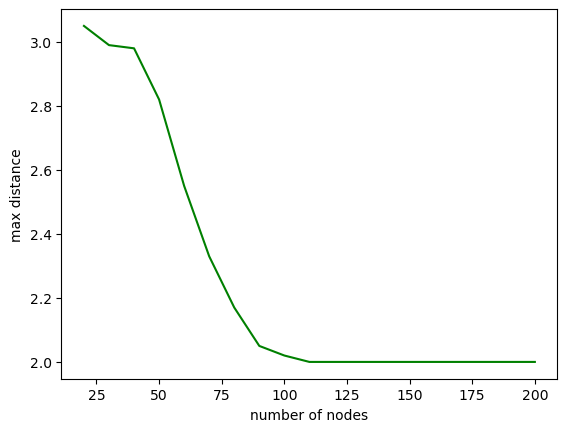

In [58]:
#Q18 emtiazi continue
plt.plot(ns,ans,color='g')
plt.ylabel("max distance")
plt.xlabel("number of nodes")

plt.show()